In [2]:
df = pd.read_csv("credit_card_fraud.csv")

In [24]:
df.head(10)

trans_date_trans_time                     merchant       category     amt  \
0   2019-01-01 00:00:44    Heller, Gutmann and Zieme    grocery_pos  107.23   
1   2019-01-01 00:00:51               Lind-Buckridge  entertainment  220.11   
2   2019-01-01 00:07:27                    Kiehn Inc    grocery_pos   96.29   
3   2019-01-01 00:09:03                  Beier-Hyatt   shopping_pos    7.77   
4   2019-01-01 00:21:32                   Bruen-Yost       misc_pos    6.85   
5   2019-01-01 00:22:06                    Kunze Inc    grocery_pos   90.22   
6   2019-01-01 00:22:18    Nitzsche, Kessler and Wol   shopping_pos    4.02   
7   2019-01-01 00:22:36  Kihn, Abernathy and Douglas   shopping_net    3.66   
8   2019-01-01 00:31:51          Ledner-Pfannerstill  gas_transport  102.13   
9   2019-01-01 00:34:10                Stracke-Lemke    grocery_pos   83.07   

                       city state      lat      long  city_pop  \
0                    Orient    WA  48.8878 -118.2105       149   
1                Malad City    ID  42.1808 -112.2620      4154   
2                   Grenada    CA  41.6125 -122.5258       589   
3  High Rolls Mountain Park    NM  32.9396 -105.8189       899   
4                   Freedom    WY  43.0172 -111.0292       471   
5                   Honokaa    HI  20.0827 -155.4880      4878   
6                 Valentine    NE  42.8062 -100.6215      4005   
7                   Westfir    OR  43.7575 -122.4810       597   
8                  Thompson    UT  38.9999 -109.6150        46   
9                    Conway    WA  48.3400 -122.3456        85   

                                 job         dob  \
0  Special educational needs teacher  1978-06-21   
1        Nature conservation officer  1962-01-19   
2                    Systems analyst  1945-12-21   
3                    Naval architect  1967-08-30   
4          Education officer, museum  1967-08-02   
5                    Physiotherapist  1966-12-03   
6                   Network engineer  1945-03-15   
7              Forensic psychologist  1961-05-19   
8                 Surveyor, minerals  1987-04-23   
9  Research officer, political party  1984-09-01   

                          trans_num  merch_lat  merch_long  is_fraud  
0  1f76529f8574734946361c461b024d99  49.159047 -118.186462         0  
1  a1a22d70485983eac12b5b88dad1cf95  43.150704 -112.154481         0  
2  413636e759663f264aae1819a4d4f231  41.657520 -122.230347         0  
3  8a6293af5ed278dea14448ded2685fea  32.863258 -106.520205         0  
4  f3c43d336e92a44fc2fb67058d5949e3  43.753735 -111.454923         0  
5  95826e3caa9e0b905294c6dae985aec1  19.560013 -156.045889         0  
6  20490f3f0966ce74b4aaba8dc2c4ed52  42.475590 -101.265846         0  
7  870c92b288a974a2faf1f24b05c27e33  44.278191 -121.815161         0  
8  47238da5b40d126c8abea40a857c7809  39.807313 -109.348294         0  
9  9b7a0619dcc5c572dc134f2827ed5a6b  48.682111 -122.719904         0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

In [9]:
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
print(df.columns)

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


0    337825
1      1782
Name: is_fraud, dtype: int64


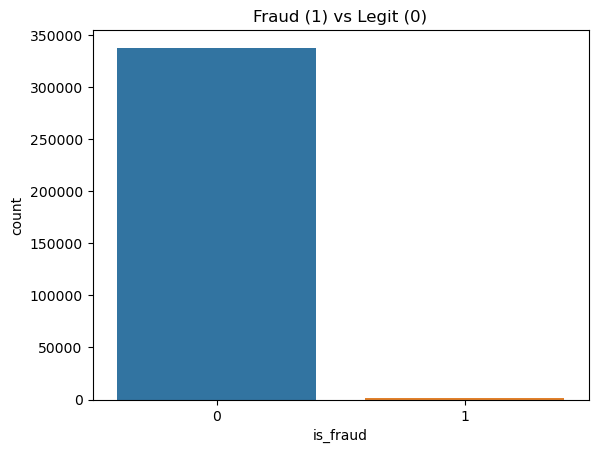

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of fraud (1) vs legit (0)
print(df['is_fraud'].value_counts())

# Visual plot
sns.countplot(x='is_fraud', data=df)
plt.title("Fraud (1) vs Legit (0)")
plt.show()

In [15]:
print(df.isnull().sum())

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [16]:
print(df.describe())

                 amt            lat           long      city_pop  \
count  339607.000000  339607.000000  339607.000000  3.396070e+05   
mean       70.577984      39.718991    -110.622605  1.071409e+05   
std       161.675242       5.094961      12.651370  2.930299e+05   
min         1.000000      20.027100    -165.672300  4.600000e+01   
25%         9.600000      36.715400    -120.093600  4.710000e+02   
50%        46.460000      39.617100    -111.098500  1.645000e+03   
75%        83.350000      41.710000    -100.621500  3.543900e+04   
max     28948.900000      66.693300     -89.628700  2.383912e+06   

           merch_lat     merch_long       is_fraud  
count  339607.000000  339607.000000  339607.000000  
mean       39.718853    -110.622383       0.005247  
std         5.130894      12.663998       0.072248  
min        19.027422    -166.671575       0.000000  
25%        36.817194    -119.823755       0.000000  
50%        39.586209    -111.036443       0.000000  
75%        42.19

In [17]:
print(df.describe())

                 amt            lat           long      city_pop  \
count  339607.000000  339607.000000  339607.000000  3.396070e+05   
mean       70.577984      39.718991    -110.622605  1.071409e+05   
std       161.675242       5.094961      12.651370  2.930299e+05   
min         1.000000      20.027100    -165.672300  4.600000e+01   
25%         9.600000      36.715400    -120.093600  4.710000e+02   
50%        46.460000      39.617100    -111.098500  1.645000e+03   
75%        83.350000      41.710000    -100.621500  3.543900e+04   
max     28948.900000      66.693300     -89.628700  2.383912e+06   

           merch_lat     merch_long       is_fraud  
count  339607.000000  339607.000000  339607.000000  
mean       39.718853    -110.622383       0.005247  
std         5.130894      12.663998       0.072248  
min        19.027422    -166.671575       0.000000  
25%        36.817194    -119.823755       0.000000  
50%        39.586209    -111.036443       0.000000  
75%        42.19

In [18]:
# Drop unnecessary columns
df_clean = df.drop(columns=[
    'trans_date_trans_time', 'merchant', 'city', 'state',
    'lat', 'long', 'job', 'dob', 'trans_num',
    'merch_lat', 'merch_long'])

In [19]:
# Print remaining columns
print(df_clean.columns)


Index(['category', 'amt', 'city_pop', 'is_fraud'], dtype='object')


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clean['category'] = le.fit_transform(df_clean['category'])


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean[['amt', 'city_pop']] = scaler.fit_transform(df_clean[['amt', 'city_pop']])

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Separate features and label
X = df_clean.drop('is_fraud', axis=1)
y = df_clean['is_fraud']

# Split into train/test before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Optional: check new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 236477, 1: 1247})
After SMOTE: Counter({0: 236477, 1: 236477})


In [23]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the balanced training data
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [26]:
#evaluate the reason 